In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# read input file
file = 'haalsi_subset_with_cal_variables.csv'
# ipData = pd.read_excel(file, sheet_name='Stroke')
data = pd.read_csv(file)
print(data.columns) 

Index(['Source', 'SiteName', 'IndividualId', 'obs_date', 'Sex', 'Age',
       'hpt_ever', 'bp_sys', 'bp_dia', 'diab_hx', 'diab_rx_ever',
       'bg_mmol_fst', 'bg_mmol_random', 'egfr_cgbsa', 'egfr_cg1', 'egfr_epi',
       'egfr_epi_aa', 'egfr_mdrd1', 'pi_acr', 'stroke_ever', 'trans_isc',
       'hrt_atck_ever', 'hrt_fail', 'angina_ever', 'bmi', 'height_cm',
       'weight_kg', 'chol_t_mmol', 'ldl_mmol', 'hdl_mmol', 'trigs_mmol',
       'waist_cm', 'hip_cm', 'visceral_fat', 'subcutaneous_fat',
       'hiv_status_slf_rpt', 'hiv_test_result', 'actv_mvpa', 'actv_mpa',
       'alco_ever', 'alco_cur', 'tobac_ever', 'tobac_cur', 'awigen',
       'wealth_quintile', 'education_status', 'marital_status',
       'employment_status', 'diabetes_status', 'hypertension_status',
       'cvd_status', 'bmi_c', 'ldl_c', 'waist_hip_ratio', 'smoking_status'],
      dtype='object')


In [77]:
dataAWIGEN = pd.read_csv('/Users/kayadetunji/Documents/AWI_GEN_PROJECT/cvd_data_awigenv1.csv').drop(columns = 
       ['Unnamed: 0', 'study_id', 'chf_meds_qc','angina_meds_qc', 'pain_action_stop_or_slow_qc', 'pain_action_rest_qc',
       'pain_action_medicine_qc', 'pain_action_carry_on_qc',
       'relief_standstill_qc', 'relief_standstill_qc.1', 'pain_location_1_qc',
       'pain_location_2_qc', 'pain_location_3_qc', 'pain_location_4_qc',
       'pain_location_5_qc', 'pain_location_6_qc', 'pain_location_7_qc',
       'pain_location_8_qc', 'pain_location_9_qc', 'pain_location_10_qc',
       'pain_location_11_qc', 'pain_location_12_qc', 'pain_location_13_qc',
       'pain_location_14_qc', 'pain_location_15_qc', 'pain_location_16_qc',
       'pain_location_17_qc', 'pain_location_18_qc','angina_treat_now_qc', 'angina_traditional_qc', 'pain_qc', 'pain2_qc'])

In [78]:
newData = ["HAALSI ONLY" if data['awigen'].iloc[i] == 0 else "HAALSI/AWIGEN" for i in range(data['awigen'].shape[0])]
newData = pd.DataFrame(newData, columns=['Population'])
# newData['Population'].value_counts().plot(kind='bar', rot=0)

In [79]:
# newData = pd.concat([newData,data],axis=1).copy()
newData.loc[:,'Population'].value_counts()

HAALSI ONLY      2573
HAALSI/AWIGEN    2486
Name: Population, dtype: int64

In [80]:
HAALSI_ONLY = data.loc[data['awigen'] == 0].copy()
HAALSI_AWIGEN = data.loc[data['awigen'] == 1].copy()
newData = ["HAALSI ONLY" if data['awigen'].iloc[i] == 0 else "HAALSI/AWIGEN" for i in range(data['awigen'].shape[0])]
newData = pd.DataFrame(newData, columns=['Population'])
newData = pd.concat([newData,data],axis=1).copy()

In [81]:
HAALSI_ONLY_TR = HAALSI_ONLY.replace([-999, 999, -111], np.nan).copy()
HAALSI_AWI_TR = HAALSI_AWIGEN.replace([-999, 999], np.nan).copy()
AWIGEN_TR = dataAWIGEN.replace([-999, 999], np.nan).copy()
newData_TR = newData.replace([-999, 999], np.nan).copy()

## Slice age for all groups

In [82]:
HAALSI_ONLY_TR_AGE = HAALSI_ONLY_TR[(HAALSI_ONLY_TR['Age'] <= 65) & (HAALSI_ONLY_TR['Age'] >= 40)].copy()
HAALSI_AWI_TR_AGE = HAALSI_AWI_TR[(HAALSI_AWI_TR['Age'] <= 65) & (HAALSI_AWI_TR['Age'] >= 40)].copy()
AWIGEN_TR_AGE = AWIGEN_TR[(AWIGEN_TR['age'] <= 65) & (AWIGEN_TR['age'] >= 40)].copy()

In [83]:
print('HAALSI: ', HAALSI_ONLY.shape[0])
print('HAALSI/AWI-GEN: ', HAALSI_AWIGEN.shape[0])

HAALSI:  2573
HAALSI/AWI-GEN:  2486


In [84]:
HAALSI_ONLY.shape[0]

2573

In [85]:
print('HAALSI ONLY Male (%): ', HAALSI_ONLY['Sex'].value_counts()[0]/HAALSI_ONLY.shape[0]*100,'%')

HAALSI ONLY Male (%):  50.524679362611735 %


In [86]:
HAALSI_ONLY.loc[HAALSI_ONLY['Sex'] == 'M'].shape[0]/HAALSI_ONLY.shape[0]*100

50.524679362611735

In [87]:
HAALSI_AWIGEN.loc[HAALSI_AWIGEN['Sex'] == 'M'].shape[0]/HAALSI_AWIGEN.shape[0]*100

42.19629927594529

In [88]:
HAALSI_ONLY['cvd_status'].loc[HAALSI_ONLY['Sex'] == 'M']

3       0
8       0
15      0
24      0
27      0
       ..
5028    0
5036    0
5042    0
5044    1
5048    0
Name: cvd_status, Length: 1300, dtype: int64

In [89]:
HAALSI_ONLY.loc[HAALSI_ONLY['cvd_status']==1].shape

(150, 55)

In [90]:
HAALSI_AWI_TR['hiv_status_slf_rpt'].loc[HAALSI_AWI_TR['hypertension_status'] == 1].value_counts()[1]/HAALSI_AWI_TR.loc[HAALSI_AWI_TR['hypertension_status']==1].shape[0]*100

10.805500982318271

In [91]:
HAALSI_AWI_TR.loc[HAALSI_AWI_TR['hypertension_status']==1].shape[0]

1527

In [92]:
HAALSI_AWI_TR['hiv_status_slf_rpt'].loc[HAALSI_AWI_TR['hypertension_status'] == 1].value_counts()

0.0      882
888.0    475
1.0      165
Name: hiv_status_slf_rpt, dtype: int64

In [93]:
HAALSI_AWI_TR['hypertension_status'].loc[HAALSI_AWI_TR['hiv_status_slf_rpt'] == 1].value_counts()

0    202
1    165
Name: hypertension_status, dtype: int64

In [94]:
HAALSI_AWI_TR['hiv_status_slf_rpt'].loc[HAALSI_AWI_TR['hypertension_status']].value_counts()

0.0    1527
1.0     959
Name: hiv_status_slf_rpt, dtype: int64

In [95]:
HAALSI_AWI_TR['hypertension_status'].value_counts()

1    1527
0     959
Name: hypertension_status, dtype: int64

In [96]:
HAALSI_AWI_TR['hiv_status_slf_rpt'].value_counts()

0.0      1336
888.0     774
1.0       367
Name: hiv_status_slf_rpt, dtype: int64

In [97]:
HAALSI_AWI_TR['hiv_status_slf_rpt'].loc[HAALSI_AWI_TR['hypertension_status'] == 1].isnull().sum()

5

In [98]:
HAALSI_AWI_TR.loc[HAALSI_AWI_TR['hypertension_status']==1].shape[0]

1527

In [99]:
HAALSI_AWI_TR['hiv_status_slf_rpt'].loc[HAALSI_AWI_TR['hypertension_status'] == 1].value_counts()

0.0      882
888.0    475
1.0      165
Name: hiv_status_slf_rpt, dtype: int64

In [100]:
HAALSI_AWI_TR['hiv_status_slf_rpt'].loc[HAALSI_AWI_TR['hiv_status_slf_rpt'] == 1].loc[HAALSI_AWI_TR['hypertension_status'] == 1].value_counts()

1.0    165
Name: hiv_status_slf_rpt, dtype: int64

In [101]:
print('HAALSI Female % CVD:', HAALSI_ONLY_TR['Sex'].loc[HAALSI_ONLY_TR['cvd_status'] == 1].value_counts()[0]/HAALSI_ONLY_TR.loc[HAALSI_ONLY_TR['cvd_status']==1].shape[0]*100)
print('HAALSI Female % DM:', HAALSI_ONLY_TR['Sex'].loc[HAALSI_ONLY_TR['diabetes_status'] == 1].value_counts()[0]/HAALSI_ONLY_TR.loc[HAALSI_ONLY_TR['diabetes_status']==1].shape[0]*100)
print('HAALSI Female % HT:', HAALSI_ONLY_TR['Sex'].loc[HAALSI_ONLY_TR['hypertension_status'] == 1].value_counts()[0]/HAALSI_ONLY_TR.loc[HAALSI_ONLY_TR['hypertension_status']==1].shape[0]*100)
print()
print('HAALSI/AWIGEN Female % CVD:', HAALSI_AWI_TR['Sex'].loc[HAALSI_AWI_TR['cvd_status'] == 1].value_counts()[0]/HAALSI_AWI_TR.loc[HAALSI_AWI_TR['cvd_status']==1].shape[0]*100)
print('HAALSI/AWIGEN Female % DM:', HAALSI_AWI_TR['Sex'].loc[HAALSI_AWI_TR['diabetes_status'] == 1].value_counts()[0]/HAALSI_AWI_TR.loc[HAALSI_AWI_TR['diabetes_status']==1].shape[0]*100)
print('HAALSI/AWIGEN Female % HT:', HAALSI_AWI_TR['Sex'].loc[HAALSI_AWI_TR['hypertension_status'] == 1].value_counts()[0]/HAALSI_AWI_TR.loc[HAALSI_AWI_TR['hypertension_status']==1].shape[0]*100)
print('=========================**************===========================')
print('HAALSI HIV+ % CVD:', HAALSI_ONLY_TR['hiv_status_slf_rpt'].loc[HAALSI_ONLY_TR['cvd_status'] == 1].value_counts()[1]/HAALSI_ONLY_TR.loc[HAALSI_ONLY_TR['cvd_status']==1].shape[0]*100)
print('HAALSI HIV+ % DM:', HAALSI_ONLY_TR['hiv_status_slf_rpt'].loc[HAALSI_ONLY_TR['diabetes_status'] == 1].value_counts()[1]/HAALSI_ONLY_TR.loc[HAALSI_ONLY_TR['diabetes_status']==1].shape[0]*100)
print('HAALSI HIV+ % HT:', HAALSI_ONLY_TR['hiv_status_slf_rpt'].loc[HAALSI_ONLY_TR['hypertension_status'] == 1].value_counts()[1]/HAALSI_ONLY_TR.loc[HAALSI_ONLY_TR['hypertension_status']==1].shape[0]*100)
print()
print('HAALSI/AWIGEN HIV+ % CVD:', HAALSI_AWI_TR['hiv_status_slf_rpt'].loc[HAALSI_AWI_TR['cvd_status'] == 1].value_counts()[1]/HAALSI_AWI_TR.loc[HAALSI_AWI_TR['cvd_status']==1].shape[0]*100)
print('HAALSI/AWIGEN HIV+ % DM:', HAALSI_AWI_TR['hiv_status_slf_rpt'].loc[HAALSI_AWI_TR['diabetes_status'] == 1].value_counts()[1]/HAALSI_AWI_TR.loc[HAALSI_AWI_TR['diabetes_status']==1].shape[0]*100)
print('HAALSI/AWIGEN HIV+ % HT:', HAALSI_AWI_TR['hiv_status_slf_rpt'].loc[HAALSI_AWI_TR['hypertension_status'] == 1].value_counts()[1]/HAALSI_AWI_TR.loc[HAALSI_AWI_TR['hypertension_status']==1].shape[0]*100)

HAALSI Female % CVD: 54.0
HAALSI Female % DM: 56.17529880478087
HAALSI Female % HT: 53.399258343634116

HAALSI/AWIGEN Female % CVD: 64.53900709219859
HAALSI/AWIGEN Female % DM: 58.85167464114832
HAALSI/AWIGEN Female % HT: 61.42763588736084
=========================**************===========================
HAALSI HIV+ % CVD: 7.333333333333333
HAALSI HIV+ % DM: 8.366533864541832
HAALSI HIV+ % HT: 7.107540173053152

HAALSI/AWIGEN HIV+ % CVD: 12.76595744680851
HAALSI/AWIGEN HIV+ % DM: 7.177033492822966
HAALSI/AWIGEN HIV+ % HT: 10.805500982318271


In [102]:
print('HAALSI Missing % CVD:', HAALSI_ONLY_TR['cvd_status'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI Missing % DM:', HAALSI_ONLY_TR['diabetes_status'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI Missing % HT:', HAALSI_ONLY_TR['hypertension_status'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print()
print('HAALSI/AWIGEN Missing % CVD:', HAALSI_AWI_TR['diabetes_status'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print('HAALSI/AWIGEN Missing % DM:', HAALSI_AWI_TR['diabetes_status'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print('HAALSI/AWIGEN Missing % HT:', HAALSI_AWI_TR['hypertension_status'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)

HAALSI Missing % CVD: 0.0
HAALSI Missing % DM: 0.0388651379712398
HAALSI Missing % HT: 0.0

HAALSI/AWIGEN Missing % CVD: 0.0
HAALSI/AWIGEN Missing % DM: 0.0
HAALSI/AWIGEN Missing % HT: 0.0


In [103]:
HAALSI_ONLY['Sex'].loc[HAALSI_ONLY['hiv_status_slf_rpt'] == 1].value_counts()[0]/HAALSI_ONLY.loc[HAALSI_ONLY['hiv_status_slf_rpt']==1].shape[0]*100

54.296875

In [104]:
print('HAALSI/AWIGEN Male (%): ', HAALSI_AWIGEN['Sex'].value_counts()[1]/HAALSI_AWIGEN.shape[0]*100,'%')

HAALSI/AWIGEN Male (%):  42.19629927594529 %


In [105]:
HAALSI_ONLY['actv_mpa'].value_counts()[0]/HAALSI_ONLY.shape[0]*100

1.90439176059075

In [106]:
data['actv_mpa'].value_counts()[0]/data.shape[0]*100

1.8185412136785923

In [107]:
HAALSI_ONLY_TR.describe()

,Age,hpt_ever,bp_sys,bp_dia,diab_hx,diab_rx_ever,bg_mmol_fst,bg_mmol_random,egfr_cgbsa,egfr_cg1,...,education_status,marital_status,employment_status,diabetes_status,hypertension_status,cvd_status,bmi_c,ldl_c,waist_hip_ratio,smoking_status
count,2573.000000,2570.000000,2450.000000,2450.000000,2568.000000,2566.000000,0.0,2282.000000,0.0,0.0,...,2561.000000,2569.000000,2566.000000,2572.000000,2573.000000,2573.000000,1587.000000,1893.000000,2235.000000,2570.000000
mean,66.476875,0.414397,139.487143,81.869184,0.071262,825.424396,NaN,6.789154,NaN,NaN,...,1.746193,2.273647,1.951286,0.097589,0.628838,0.058298,27.065006,2.046834,0.910623,0.349027
std,13.738106,0.492713,24.352680,13.086956,0.257312,227.192833,NaN,3.299299,NaN,NaN,...,0.940625,0.860754,0.488827,0.296816,0.483210,0.234351,11.270247,1.052179,0.085184,0.697525
min,41.000000,0.000000,79.500000,42.500000,0.000000,0.000000,NaN,1.200000,NaN,NaN,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.930087,0.016364,0.576471,0.000000
25%,56.000000,0.000000,121.500000,73.000000,0.000000,888.000000,NaN,5.100000,NaN,NaN,...,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,22.219267,1.331818,0.863942,0.000000
50%,65.000000,0.000000,136.000000,80.500000,0.000000,888.000000,NaN,5.800000,NaN,NaN,...,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,26.130178,1.924545,0.910280,0.000000
75%,77.000000,1.000000,154.500000,89.500000,0.000000,888.000000,NaN,7.300000,NaN,NaN,...,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,30.337017,2.632727,0.954411,0.000000
max,112.000000,1.000000,229.000000,145.000000,1.000000,888.000000,NaN,32.600000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,255.114305,7.348182,2.481481,2.000000


In [108]:
HAALSI_AWI_TR.describe()

,Age,hpt_ever,bp_sys,bp_dia,diab_hx,diab_rx_ever,bg_mmol_fst,bg_mmol_random,egfr_cgbsa,egfr_cg1,...,education_status,marital_status,employment_status,diabetes_status,hypertension_status,cvd_status,bmi_c,ldl_c,waist_hip_ratio,smoking_status
count,2486.000000,2485.000000,2445.000000,2445.000000,2485.000000,2485.000000,0.0,2344.000000,0.0,0.0,...,2481.000000,2486.000000,2479.000000,2486.000000,2486.000000,2486.000000,1666.000000,2.008000e+03,2258.000000,2484.000000
mean,59.160499,0.423742,136.487730,82.413701,0.061972,833.019316,NaN,6.561314,NaN,NaN,...,1.923418,2.258246,1.935861,0.084071,0.614240,0.056718,28.023471,1.966272e+00,0.905681,0.324074
std,11.041079,0.494250,22.181434,12.310441,0.241153,213.948064,NaN,3.023079,NaN,NaN,...,0.946012,0.924560,0.530279,0.277550,0.486872,0.231349,10.254736,1.012814e+00,0.086791,0.671651
min,31.000000,0.000000,86.000000,43.500000,0.000000,0.000000,NaN,2.700000,NaN,NaN,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.659178,4.440892e-16,0.359356,0.000000
25%,51.000000,0.000000,121.000000,73.500000,0.000000,888.000000,NaN,5.000000,NaN,NaN,...,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,22.871333,1.239091e+00,0.857506,0.000000
50%,58.000000,0.000000,133.000000,82.000000,0.000000,888.000000,NaN,5.800000,NaN,NaN,...,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,26.811948,1.874545e+00,0.903523,0.000000
75%,69.000000,1.000000,149.000000,90.000000,0.000000,888.000000,NaN,7.100000,NaN,NaN,...,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,31.636317,2.555455e+00,0.951483,0.000000
max,85.000000,1.000000,230.500000,140.000000,1.000000,888.000000,NaN,32.300000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,238.447359,7.306364e+00,2.040816,2.000000


In [109]:
HAALSI_ONLY_TR.isnull().sum()/HAALSI_ONLY_TR.shape[0]*100

Source                   0.000000
SiteName                 0.000000
IndividualId             0.000000
obs_date                 0.000000
Sex                      0.000000
Age                      0.000000
hpt_ever                 0.116595
bp_sys                   4.780412
bp_dia                   4.780412
diab_hx                  0.194326
diab_rx_ever             0.272056
bg_mmol_fst            100.000000
bg_mmol_random          11.309755
egfr_cgbsa             100.000000
egfr_cg1               100.000000
egfr_epi               100.000000
egfr_epi_aa            100.000000
egfr_mdrd1             100.000000
pi_acr                 100.000000
stroke_ever              0.116595
trans_isc                0.155461
hrt_atck_ever            0.077730
hrt_fail                 0.077730
angina_ever              0.155461
bmi                     11.931597
height_cm               37.893510
weight_kg               13.991450
chol_t_mmol             20.481928
ldl_mmol                27.399922
hdl_mmol      

In [110]:
HAALSI_AWI_TR.isnull().sum()/HAALSI_AWI_TR.shape[0]*100

Source                   0.000000
SiteName                 0.000000
IndividualId             0.000000
obs_date                 0.000000
Sex                      0.000000
Age                      0.000000
hpt_ever                 0.040225
bp_sys                   1.649236
bp_dia                   1.649236
diab_hx                  0.040225
diab_rx_ever             0.040225
bg_mmol_fst            100.000000
bg_mmol_random           5.711987
egfr_cgbsa             100.000000
egfr_cg1               100.000000
egfr_epi               100.000000
egfr_epi_aa            100.000000
egfr_mdrd1             100.000000
pi_acr                 100.000000
stroke_ever              0.000000
trans_isc                0.000000
hrt_atck_ever            0.040225
hrt_fail                 0.040225
angina_ever              0.000000
bmi                      2.534191
height_cm               32.341110
weight_kg                8.567981
chol_t_mmol             13.515688
ldl_mmol                20.635559
hdl_mmol      

In [111]:
# anginaData = data.loc[data['angina_qc'] == 1]
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i]//2, y[i], ha = 'center',fontweight='bold')
# plt.bar(['Treatment','Ongoing meds', 'Ongoing Trad meds'],[anginaData['angina_treatment_yn_qc'].value_counts()[1], anginaData['angina_treat_now_qc'].value_counts()[1], anginaData['angina_traditional_qc'].value_counts()[1]],color='blue')
# addlabels([anginaData['angina_treatment_yn_qc'].value_counts()[1], anginaData['angina_treat_now_qc'].value_counts()[1], anginaData['angina_traditional_qc'].value_counts()[1]], [anginaData['angina_treatment_yn_qc'].value_counts()[1], anginaData['angina_treat_now_qc'].value_counts()[1], anginaData['angina_traditional_qc'].value_counts()[1]])
# plt.title('Treatment for Angina')

#### Mean, Variance and Std-dev

In [112]:
print(" HAALSI only - Mean (std):")
print('bp_sys: ',np.mean(HAALSI_ONLY_TR['bp_sys']), '(', np.std(HAALSI_ONLY_TR['bp_sys']),')')
print('bp_dia: ',np.mean(HAALSI_ONLY_TR['bp_dia']), '(', np.std(HAALSI_ONLY_TR['bp_dia']),')')
print('height_cm: ',np.mean(HAALSI_ONLY_TR['height_cm']), '(', np.std(HAALSI_ONLY_TR['height_cm']),')')
print('weight_kg: ',np.mean(HAALSI_ONLY_TR['weight_kg']), '(', np.std(HAALSI_ONLY_TR['weight_kg']),')')

print()

print("HAALSI/AWIGEN - Mean (std):")
print('bp_sys: ',np.mean(HAALSI_AWI_TR['bp_sys']), '(', np.std(HAALSI_AWI_TR['bp_sys']),')')
print('bp_dia: ',np.mean(HAALSI_AWI_TR['bp_dia']), '(', np.std(HAALSI_AWI_TR['bp_dia']),')')
print('height_cm: ',np.mean(HAALSI_AWI_TR['height_cm']), '(', np.std(HAALSI_AWI_TR['height_cm']),')')
print('weight_kg: ',np.mean(HAALSI_AWI_TR['weight_kg']), '(', np.std(HAALSI_AWI_TR['weight_kg']),')')

 HAALSI only - Mean (std):
bp_sys:  139.48714285714286 ( 24.347709484525552 )
bp_dia:  81.8691836734694 ( 13.084284441023543 )
height_cm:  161.69042553191488 ( 10.53873668462135 )
weight_kg:  70.35976050610032 ( 18.03544433122213 )

HAALSI/AWIGEN - Mean (std):
bp_sys:  136.48773006134968 ( 22.176897390617185 )
bp_dia:  82.41370143149284 ( 12.307923711776317 )
height_cm:  161.77871581450657 ( 10.295671660953172 )
weight_kg:  72.93901891772987 ( 18.05096572545984 )


In [113]:
print(" HAALSI only - Mean (std):")
print('Age: ',np.mean(HAALSI_ONLY_TR['Age']), '(', np.std(HAALSI_ONLY_TR['Age']),')')
print('BMI: ',np.mean(HAALSI_ONLY_TR['bmi_c']), '(', np.std(HAALSI_ONLY_TR['bmi_c']),')')
print('Trig: ',np.mean(HAALSI_ONLY_TR['trigs_mmol']), '(', np.std(HAALSI_ONLY_TR['trigs_mmol']),')')
print('Waist-hip: ',np.mean(HAALSI_ONLY_TR['waist_hip_ratio']), '(', np.std(HAALSI_ONLY_TR['waist_hip_ratio']),')')
print('Cholesterol: ',np.mean(HAALSI_ONLY_TR['chol_t_mmol']), '(', np.std(HAALSI_ONLY_TR['chol_t_mmol']),')')
print('Waist (cm): ',np.mean(HAALSI_ONLY_TR['waist_cm']), '(', np.std(HAALSI_ONLY_TR['waist_cm']),')')
print('LDL: ',np.mean(HAALSI_ONLY_TR['ldl_c']), '(', np.std(HAALSI_ONLY_TR['ldl_c']),')')

print()

print("HAALSI/AWIGEN - Mean (std):")
print('Age: ',np.mean(HAALSI_AWI_TR['Age']), '(', np.std(HAALSI_AWI_TR['Age']),')')
print('BMI: ',np.mean(HAALSI_AWI_TR['bmi_c']), '(', np.std(HAALSI_AWI_TR['bmi_c']),')')
print('Trig: ',np.mean(HAALSI_AWI_TR['trigs_mmol']), '(', np.std(HAALSI_AWI_TR['trigs_mmol']),')')
print('Waist-hip: ',np.mean(HAALSI_AWI_TR['waist_hip_ratio']), '(', np.std(HAALSI_AWI_TR['waist_hip_ratio']),')')
print('Cholesterol: ',np.mean(HAALSI_AWI_TR['chol_t_mmol']), '(', np.std(HAALSI_AWI_TR['chol_t_mmol']),')')
print('Waist (cm): ',np.mean(HAALSI_AWI_TR['waist_cm']), '(', np.std(HAALSI_AWI_TR['waist_cm']),')')
print('LDL: ',np.mean(HAALSI_AWI_TR['ldl_c']), '(', np.std(HAALSI_AWI_TR['ldl_c']),')')

 HAALSI only - Mean (std):
Age:  66.47687524290711 ( 13.735436396811863 )
BMI:  27.06500616532076 ( 11.266695285963355 )
Trig:  1.770548277535177 ( 2.0317562882803406 )
Waist-hip:  0.9106234101346775 ( 0.0851646284344105 )
Cholesterol:  4.261754643206256 ( 1.3049192214095675 )
Waist (cm):  91.60748663101603 ( 14.692320441560156 )
LDL:  2.0468342697978197 ( 1.0519014219546432 )

HAALSI/AWIGEN - Mean (std):
Age:  59.160498793242155 ( 11.038857736255045 )
BMI:  28.023471206353552 ( 10.251657875973407 )
Trig:  1.7451942645698426 ( 0.9319491993061412 )
Waist-hip:  0.9056807031731584 ( 0.08677198024050824 )
Cholesterol:  4.210841860465117 ( 1.2180742666922795 )
Waist (cm):  93.09288546255507 ( 15.365156425577858 )
LDL:  1.9662717312567912 ( 1.0125618762934454 )


In [114]:
print('HAALSI ONLY Age range: ', np.min(HAALSI_ONLY_TR['Age']), ' - ', np.max(HAALSI_ONLY_TR['Age']), '\tMissing: ', HAALSI_ONLY_TR['Age'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN Age range: ', np.min(HAALSI_AWI_TR['Age']), ' - ', np.max(HAALSI_AWI_TR['Age']), '\tMissing: ', HAALSI_AWI_TR['Age'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print()

print('HAALSI ONLY BMI range: ', np.min(HAALSI_ONLY_TR['bmi_c']), ' - ', np.max(HAALSI_ONLY_TR['bmi_c']), '\tMissing: ', HAALSI_ONLY_TR['bmi_c'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN BMI range: ', np.min(HAALSI_AWI_TR['bmi_c']), ' - ', np.max(HAALSI_AWI_TR['bmi_c']), '\tMissing: ', HAALSI_AWI_TR['bmi_c'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print()

print('HAALSI ONLY Trig range: ', np.min(HAALSI_ONLY_TR['trigs_mmol']), ' - ', np.max(HAALSI_ONLY_TR['trigs_mmol']), '\tMissing: ', HAALSI_ONLY_TR['trigs_mmol'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN Trig range: ', np.min(HAALSI_AWI_TR['trigs_mmol']), ' - ', np.max(HAALSI_AWI_TR['trigs_mmol']), '\tMissing: ', HAALSI_AWI_TR['trigs_mmol'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print()

print('HAALSI ONLY Waist-hip range: ', np.min(HAALSI_ONLY_TR['waist_hip_ratio']), ' - ', np.max(HAALSI_ONLY_TR['waist_hip_ratio']), '\tMissing: ', HAALSI_ONLY_TR['waist_hip_ratio'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN Waist-hip range: ', np.min(HAALSI_AWI_TR['waist_hip_ratio']), ' - ', np.max(HAALSI_AWI_TR['waist_hip_ratio']), '\tMissing: ', HAALSI_AWI_TR['waist_hip_ratio'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print()

print('HAALSI ONLY Cholesterol range: ', np.min(HAALSI_ONLY_TR['chol_t_mmol']), ' - ', np.max(HAALSI_ONLY_TR['chol_t_mmol']), '\tMissing: ', HAALSI_ONLY_TR['chol_t_mmol'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN Cholesterol range: ', np.min(HAALSI_AWI_TR['chol_t_mmol']), ' - ', np.max(HAALSI_AWI_TR['chol_t_mmol']), '\tMissing: ', HAALSI_AWI_TR['chol_t_mmol'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print()

print('HAALSI ONLY Waist (cm) range: ', np.min(HAALSI_ONLY_TR['waist_cm']), ' - ', np.max(HAALSI_ONLY_TR['waist_cm']), '\tMissing: ', HAALSI_ONLY_TR['waist_cm'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN Waist (cm) range: ', np.min(HAALSI_AWI_TR['waist_cm']), ' - ', np.max(HAALSI_AWI_TR['waist_cm']), '\tMissing: ', HAALSI_AWI_TR['waist_cm'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print()

print('HAALSI ONLY LDL range: ', np.min(HAALSI_ONLY_TR['ldl_c']), ' - ', np.max(HAALSI_ONLY_TR['ldl_c']), '\tMissing: ', HAALSI_ONLY_TR['ldl_c'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN LDL range: ', np.min(HAALSI_AWI_TR['ldl_c']), ' - ', np.max(HAALSI_AWI_TR['ldl_c']), '\tMissing: ', HAALSI_AWI_TR['ldl_c'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)

HAALSI ONLY Age range:  41.0  -  112.0 	Missing:  0.0
HAALSI//AWIGEN Age range:  31.0  -  85.0 	Missing:  0.0

HAALSI ONLY BMI range:  8.930087143503847  -  255.11430516633607 	Missing:  38.32102603964244
HAALSI//AWIGEN BMI range:  8.65917764077217  -  238.44735939643343 	Missing:  32.984714400643604

HAALSI ONLY Trig range:  0.37  -  83.0 	Missing:  19.898950641274777
HAALSI//AWIGEN Trig range:  0.09  -  5.65 	Missing:  13.032984714400644

HAALSI ONLY Waist-hip range:  0.5764705882352941  -  2.4814814814814814 	Missing:  13.136416634279053
HAALSI//AWIGEN Waist-hip range:  0.3593556381660471  -  2.0408163265306123 	Missing:  9.17135961383749

HAALSI ONLY Cholesterol range:  0.95  -  10.36 	Missing:  20.481927710843372
HAALSI//AWIGEN Cholesterol range:  1.5  -  10.36 	Missing:  13.515687851971038

HAALSI ONLY Waist (cm) range:  20.0  -  162.5 	Missing:  12.786630392537893
HAALSI//AWIGEN Waist (cm) range:  20.0  -  190.5 	Missing:  8.688656476267095

HAALSI ONLY LDL range:  0.01636363636

In [115]:
print('HAALSI ONLY bp_sys range: ', np.min(HAALSI_ONLY_TR['bp_sys']), ' - ', np.max(HAALSI_ONLY_TR['bp_sys']), '\tMissing: ', HAALSI_ONLY_TR['bp_sys'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN bp_sys range: ', np.min(HAALSI_AWI_TR['bp_sys']), ' - ', np.max(HAALSI_AWI_TR['bp_sys']), '\tMissing: ', HAALSI_AWI_TR['bp_sys'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print()

print('HAALSI ONLY bp_dia range: ', np.min(HAALSI_ONLY_TR['bp_dia']), ' - ', np.max(HAALSI_ONLY_TR['bp_dia']), '\tMissing: ', HAALSI_ONLY_TR['bp_dia'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN bp_dia range: ', np.min(HAALSI_AWI_TR['bp_dia']), ' - ', np.max(HAALSI_AWI_TR['bp_dia']), '\tMissing: ', HAALSI_AWI_TR['bp_dia'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print()

print('HAALSI ONLY height_cm range: ', np.min(HAALSI_ONLY_TR['height_cm']), ' - ', np.max(HAALSI_ONLY_TR['height_cm']), '\tMissing: ', HAALSI_ONLY_TR['height_cm'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN height_cm range: ', np.min(HAALSI_AWI_TR['height_cm']), ' - ', np.max(HAALSI_AWI_TR['height_cm']), '\tMissing: ', HAALSI_AWI_TR['height_cm'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print()

print('HAALSI ONLY weight_kg range: ', np.min(HAALSI_ONLY_TR['weight_kg']), ' - ', np.max(HAALSI_ONLY_TR['weight_kg']), '\tMissing: ', HAALSI_ONLY_TR['weight_kg'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI//AWIGEN weight_kg range: ', np.min(HAALSI_AWI_TR['weight_kg']), ' - ', np.max(HAALSI_AWI_TR['weight_kg']), '\tMissing: ', HAALSI_AWI_TR['weight_kg'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)


HAALSI ONLY bp_sys range:  79.5  -  229.0 	Missing:  4.780411970462495
HAALSI//AWIGEN bp_sys range:  86.0  -  230.5 	Missing:  1.6492357200321803

HAALSI ONLY bp_dia range:  42.5  -  145.0 	Missing:  4.780411970462495
HAALSI//AWIGEN bp_dia range:  43.5  -  140.0 	Missing:  1.6492357200321803

HAALSI ONLY height_cm range:  80.3  -  199.2 	Missing:  37.893509521958805
HAALSI//AWIGEN height_cm range:  80.0  -  191.2 	Missing:  32.34111021721641

HAALSI ONLY weight_kg range:  20.2  -  174.5 	Missing:  13.991449669646327
HAALSI//AWIGEN weight_kg range:  21.1  -  178.0 	Missing:  8.567980691874496


In [116]:
np.max(HAALSI_AWI_TR['ldl_mmol'])

72.0

In [117]:
from scipy import stats as st
print('HAALSI only SES mode: ', st.mode(HAALSI_ONLY_TR['wealth_quintile']), '\tMissing: ', HAALSI_ONLY_TR['wealth_quintile'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI only education status mode: ', st.mode(HAALSI_ONLY_TR['education_status']), '\tMissing: ', HAALSI_ONLY_TR['education_status'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI only employment status mode: ', st.mode(HAALSI_ONLY_TR['employment_status']), '\tMissing: ', HAALSI_ONLY_TR['employment_status'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI only marital status mode: ', st.mode(HAALSI_ONLY_TR['marital_status']), '\tMissing: ', HAALSI_ONLY_TR['marital_status'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print('HAALSI only hiv_status_slf_rpt status mode: ', st.mode(HAALSI_ONLY_TR['hiv_status_slf_rpt']), '\tMissing: ', HAALSI_ONLY_TR['hiv_status_slf_rpt'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
print()
print('HAALSI/AWIGEN SES mode: ', st.mode(HAALSI_AWI_TR['wealth_quintile']), '\tMissing: ', HAALSI_AWI_TR['wealth_quintile'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print('HAALSI/AWIGEN education status mode: ', st.mode(HAALSI_AWI_TR['education_status']), '\tMissing: ', HAALSI_AWI_TR['education_status'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print('HAALSI/AWIGEN employment status mode: ', st.mode(HAALSI_AWI_TR['employment_status']), '\tMissing: ', HAALSI_AWI_TR['employment_status'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print('HAALSI/AWIGEN marital status mode: ', st.mode(HAALSI_AWI_TR['marital_status']), '\tMissing: ', HAALSI_AWI_TR['marital_status'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)
print('HAALSI/AWIGEN hiv_status_slf_rpt status mode: ', st.mode(HAALSI_AWI_TR['hiv_status_slf_rpt']), '\tMissing: ', HAALSI_AWI_TR['hiv_status_slf_rpt'].isnull().sum()/HAALSI_AWI_TR.shape[0]*100)

HAALSI only SES mode:  ModeResult(mode=array([4]), count=array([521])) 	Missing:  0.0
HAALSI only education status mode:  ModeResult(mode=array([1.]), count=array([1324])) 	Missing:  0.4663816556548776
HAALSI only employment status mode:  ModeResult(mode=array([2.]), count=array([1947])) 	Missing:  0.2720559657986786
HAALSI only marital status mode:  ModeResult(mode=array([3.]), count=array([1266])) 	Missing:  0.1554605518849592
HAALSI only hiv_status_slf_rpt status mode:  ModeResult(mode=array([0.]), count=array([1251])) 	Missing:  1.0104935872522347

HAALSI/AWIGEN SES mode:  ModeResult(mode=array([1]), count=array([528])) 	Missing:  0.0
HAALSI/AWIGEN education status mode:  ModeResult(mode=array([1.]), count=array([982])) 	Missing:  0.2011263073209976
HAALSI/AWIGEN employment status mode:  ModeResult(mode=array([2.]), count=array([1772])) 	Missing:  0.2815768302493966
HAALSI/AWIGEN marital status mode:  ModeResult(mode=array([3.]), count=array([1309])) 	Missing:  0.0
HAALSI/AWIGEN hi

/var/folders/gv/py_qrkp162g_1kqt0zrs11qc0000gn/T/ipykernel_37218/1598460469.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('HAALSI only SES mode: ', st.mode(HAALSI_ONLY_TR['wealth_quintile']), '\tMissing: ', HAALSI_ONLY_TR['wealth_quintile'].isnull().sum()/HAALSI_ONLY_TR.shape[0]*100)
/var/folders/gv/py_qrkp162g_1kqt0zrs11qc0000gn/T/ipykernel_37218/1598460469.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axi

In [118]:
HAALSI_ONLY_TR['hypertension_status'].value_counts(normalize=True)

1    0.628838
0    0.371162
Name: hypertension_status, dtype: float64

In [119]:
HAALSI_AWI_TR['hypertension_status'].value_counts(normalize=True)*100

1    61.423974
0    38.576026
Name: hypertension_status, dtype: float64

In [120]:
newData['hypertension_status'].value_counts()

1    3145
0    1914
Name: hypertension_status, dtype: int64

#### Set age range for both HAALSI/AWIGEN overlap and AWIGEN study
#### Check baseline

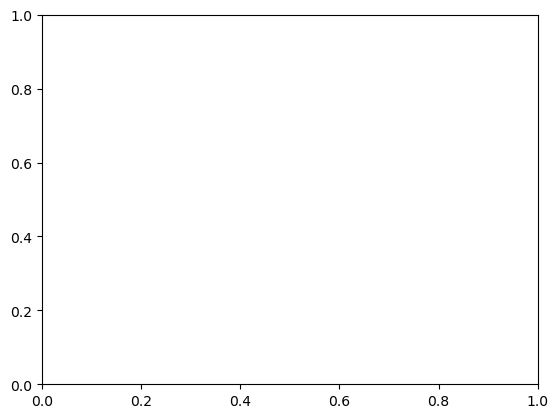

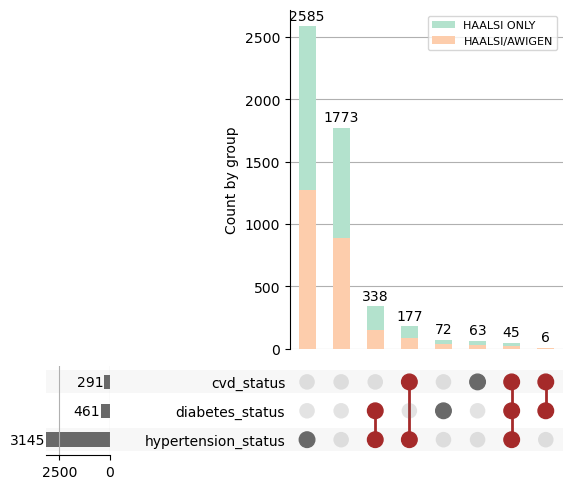

In [121]:
import upsetplot
from upsetplot import UpSet, plot, from_indicators
from upsetplot import from_contents
from matplotlib import cm

conditions = data.reindex(columns=['cvd_status', 'diabetes_status','hypertension_status']).copy()
conditions_upset = conditions.mask(conditions == 1, np.nan)
population = newData.reindex(columns=['Population']).copy()
conditions_upset1 = pd.concat([conditions_upset, population], axis=1)

upset = UpSet(from_indicators(pd.isna, data=conditions_upset1), show_counts=True, max_subset_size=5000,intersection_plot_elements=0, facecolor='dimgrey', sort_by= 'cardinality')


upset.style_subsets(present=['cvd_status', 'diabetes_status','hypertension_status'],
                    # absent=['pain_action_medicine_qc', 'pain_action_carry_on_qc'],
                    facecolor="brown",
                    label="multimorbidity")
upset.style_subsets(present=['cvd_status', 'hypertension_status'],
                    # absent=['pain_action_medicine_qc', 'pain_action_carry_on_qc'],
                    facecolor="brown",
                    label="multimorbidity")
upset.style_subsets(present=['diabetes_status','hypertension_status'],
                    # absent=['pain_action_medicine_qc', 'pain_action_carry_on_qc'],
                    facecolor="brown",
                    label="multimorbidity")
upset.style_subsets(present=['cvd_status', 'diabetes_status'],
                    # absent=['pain_action_medicine_qc', 'pain_action_carry_on_qc'],
                    facecolor="brown",
                    label="multimorbidity")


upset.add_stacked_bars(by="Population", colors=cm.Pastel2,
                       title="Count by group", elements=10)


# upset.plot()
params = {'legend.fontsize': 8}
with plt.rc_context(params):
    upset.plot()
# plt.suptitle("Styles for every category!")
plt.show()
# plt.figure(figsize=(15,6))

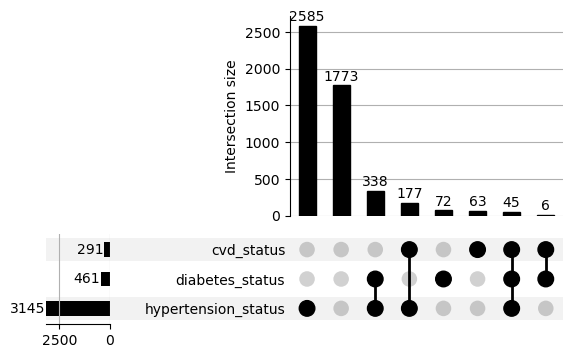

In [122]:
upset = UpSet(from_indicators(pd.isna, data=conditions_upset1), show_counts=True, sort_by= 'cardinality')
upset.plot()
# plt.title("UpSet plot for neck/shoulder area pain")
plt.show()

In [123]:
conditions_upset.isnull().value_counts(normalize=True)*100
# conditions['diabetes_status'] = conditions['diabetes_status'].astype(int)
# conditions['diabetes_status'].value_counts()

cvd_status  diabetes_status  hypertension_status
False       False            True                   51.097055
                             False                  35.046452
            True             True                    6.681162
True        False            True                    3.498715
False       True             False                   1.423206
True        False            False                   1.245305
            True             True                    0.889504
                             False                   0.118601
dtype: float64

In [124]:
conditions_upset['cvd_status'].value_counts()

0.0    4768
Name: cvd_status, dtype: int64

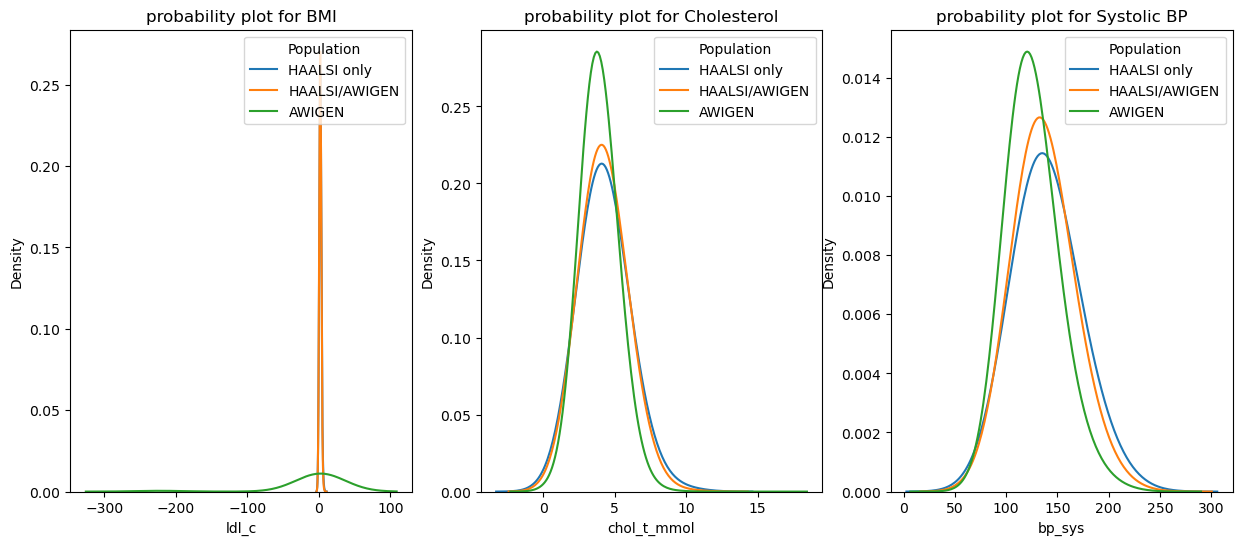

In [125]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.legend(['d', 'r'])
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title("probability plot for BMI");
sns.kdeplot(data=HAALSI_ONLY_TR, x = 'ldl_c', bw_adjust=5)
sns.kdeplot(data=HAALSI_AWI_TR, x = 'ldl_c', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR, x = 'ldl_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.subplot(132)
plt.title("probability plot for Cholesterol");
sns.kdeplot(data=HAALSI_ONLY_TR, x = 'chol_t_mmol', bw_adjust=5)
sns.kdeplot(data=HAALSI_AWI_TR, x = 'chol_t_mmol', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR, x = 'cholesterol_1_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.subplot(133)
plt.title("probability plot for Systolic BP");
sns.kdeplot(data=HAALSI_ONLY_TR, x = 'bp_sys', bw_adjust=5, legend = 'AG')
sns.kdeplot(data=HAALSI_AWI_TR, x = 'bp_sys', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR, x = 'bp_sys_average_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.show()


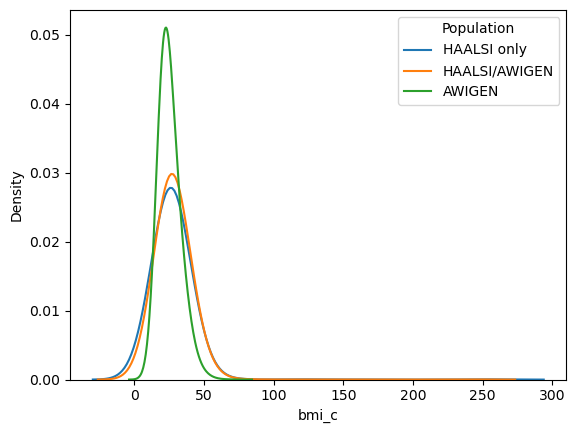

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.legend(['d', 'r'])
sns.kdeplot(data=HAALSI_ONLY_TR, x = 'bmi_c', bw_adjust=5)
sns.kdeplot(data=HAALSI_AWI_TR, x = 'bmi_c', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR, x = 'bmi_c_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.show()

In [127]:
HAALSI_ONLY_TR['cvd_status' == 0]

KeyError: False

In [ ]:
# HAALSI_ONLY_TR[HAALSI_ONLY_TR['cvd_status'] == 0]
HAALSI_ONLY_TR.loc[:,['bmi_c', 'cvd_status']]

,bmi_c,cvd_status
3,NaN,0
4,29.862877,0
7,67.657068,0
8,26.174502,0
10,33.241506,0
...,...,...
5042,34.334330,0
5043,NaN,0
5044,NaN,1
5048,24.695550,0


In [ ]:
AWIGEN_TR.htn_jnc7_qc

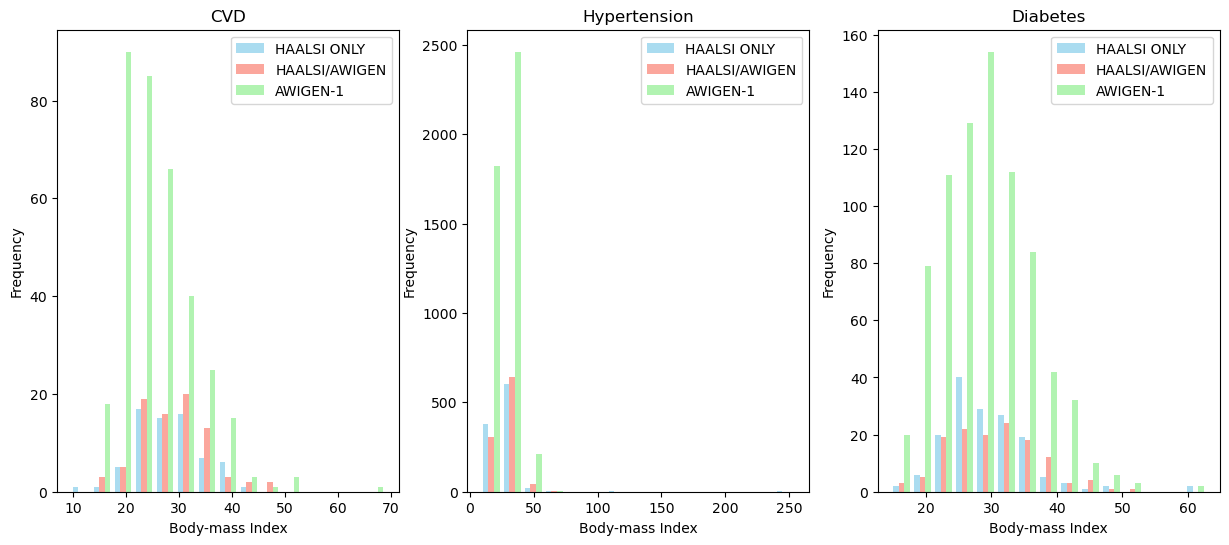

In [166]:
# binary_outcomes = np.random.randint(2, size=100)  # Generating 100 random binary values (0 or 1)
variable1 = HAALSI_ONLY_TR.loc[:,['bmi_c', 'cvd_status']].copy()  # Generating random data for Variable1
variable2 = HAALSI_AWI_TR.loc[:,['bmi_c', 'cvd_status']].copy()  # Generating random data for Variable2
variable3 = AWIGEN_TR.loc[:,['bmi_c_qc', 'cadiovascular_current']].copy()  # Generating random data for Variable2
# Group data by binary outcome
outcome_0_data = variable1[variable1['cvd_status'] == 1]
outcome_1_data = variable2[variable2['cvd_status'] == 1]
outcome_2_data = variable3[variable3['cadiovascular_current'] == 1]

# binary_outcomes = np.random.randint(2, size=100)  # Generating 100 random binary values (0 or 1)
variable4 = HAALSI_ONLY_TR.loc[:,['bmi_c', 'hypertension_status']].copy()  # Generating random data for Variable1
variable5 = HAALSI_AWI_TR.loc[:,['bmi_c', 'hypertension_status']].copy()  # Generating random data for Variable2
variable6 = AWIGEN_TR.loc[:,['bmi_c_qc', 'htn_jnc7_qc']].copy()  # Generating random data for Variable2
# Group data by binary outcome
outcome_3_data = variable4[variable4['hypertension_status'] == 1]
outcome_4_data = variable5[variable5['hypertension_status'] == 1]
outcome_5_data = variable6[variable6['htn_jnc7_qc'] == 1]

# binary_outcomes = np.random.randint(2, size=100)  # Generating 100 random binary values (0 or 1)
variable7 = HAALSI_ONLY_TR.loc[:,['bmi_c', 'diabetes_status']].copy()  # Generating random data for Variable1
variable8 = HAALSI_AWI_TR.loc[:,['bmi_c', 'diabetes_status']].copy()  # Generating random data for Variable2
variable9 = AWIGEN_TR.loc[:,['bmi_c_qc', 'diabetes_status_c_qc']].copy()  # Generating random data for Variable2
# Group data by binary outcome
outcome_6_data = variable7[variable7['diabetes_status'] == 1]
outcome_7_data = variable8[variable8['diabetes_status'] == 1]
outcome_8_data = variable9[variable9['diabetes_status_c_qc'] == 1]

plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title("CVD");
# Create a grouped histogram
plt.hist([outcome_0_data.bmi_c, outcome_1_data.bmi_c, outcome_2_data.bmi_c_qc], bins=15, alpha=0.7, label=['HAALSI ONLY', 'HAALSI/AWIGEN', 'AWIGEN-1'], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Body-mass Index')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(132)
plt.title("Hypertension");
# Create a grouped histogram
plt.hist([outcome_3_data.bmi_c, outcome_4_data.bmi_c, outcome_5_data.bmi_c_qc], bins=15, alpha=0.7, label=['HAALSI ONLY', 'HAALSI/AWIGEN', 'AWIGEN-1'], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Body-mass Index')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(133)
plt.title("Diabetes");
# Create a grouped histogram
plt.hist([outcome_6_data.bmi_c, outcome_7_data.bmi_c, outcome_8_data.bmi_c_qc], bins=15, alpha=0.7, label=['HAALSI ONLY', 'HAALSI/AWIGEN', 'AWIGEN-1'], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Body-mass Index')
plt.ylabel('Frequency')
# plt.title('Grouped Histogram of Variable1 by Binary Outcome')
plt.legend()
plt.show()

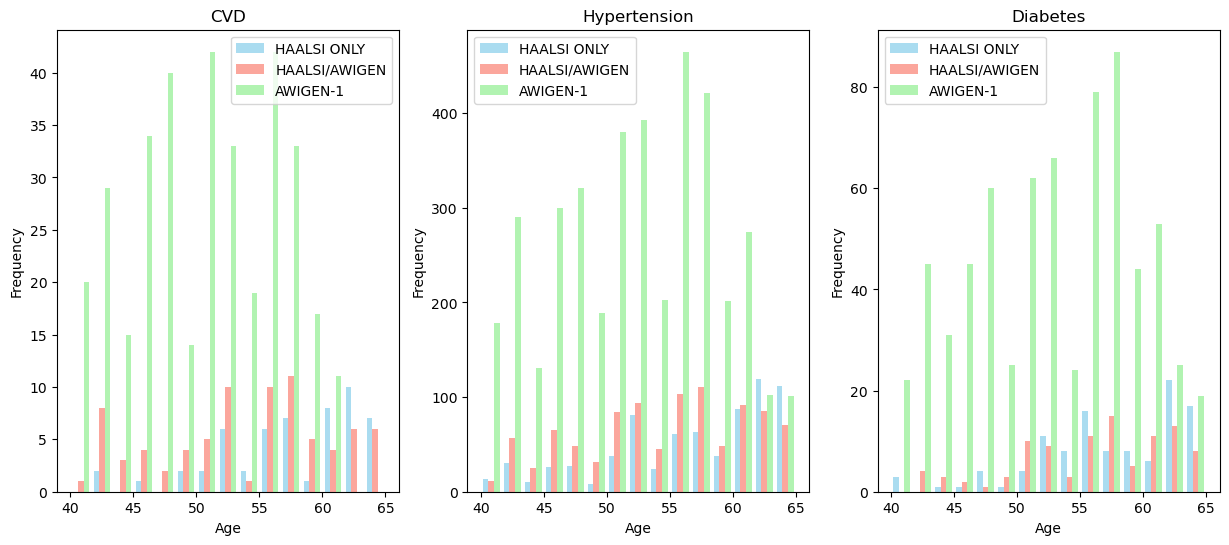

In [165]:
# binary_outcomes = np.random.randint(2, size=100)  # Generating 100 random binary values (0 or 1)
variable1 = HAALSI_ONLY_TR_AGE.loc[:,['Age', 'cvd_status']].copy()  # Generating random data for Variable1
variable2 = HAALSI_AWI_TR_AGE.loc[:,['Age', 'cvd_status']].copy()  # Generating random data for Variable2
variable3 = AWIGEN_TR_AGE.loc[:,['age', 'cadiovascular_current']].copy()  # Generating random data for Variable2
# Group data by binary outcome
outcome_0_data = variable1[variable1['cvd_status'] == 1]
outcome_1_data = variable2[variable2['cvd_status'] == 1]
outcome_2_data = variable3[variable3['cadiovascular_current'] == 1]

# binary_outcomes = np.random.randint(2, size=100)  # Generating 100 random binary values (0 or 1)
variable4 = HAALSI_ONLY_TR_AGE.loc[:,['Age', 'hypertension_status']].copy()  # Generating random data for Variable1
variable5 = HAALSI_AWI_TR_AGE.loc[:,['Age', 'hypertension_status']].copy()  # Generating random data for Variable2
variable6 = AWIGEN_TR_AGE.loc[:,['age', 'htn_jnc7_qc']].copy()  # Generating random data for Variable2
# Group data by binary outcome
outcome_3_data = variable4[variable4['hypertension_status'] == 1]
outcome_4_data = variable5[variable5['hypertension_status'] == 1]
outcome_5_data = variable6[variable6['htn_jnc7_qc'] == 1]

# binary_outcomes = np.random.randint(2, size=100)  # Generating 100 random binary values (0 or 1)
variable7 = HAALSI_ONLY_TR_AGE.loc[:,['Age', 'diabetes_status']].copy()  # Generating random data for Variable1
variable8 = HAALSI_AWI_TR_AGE.loc[:,['Age', 'diabetes_status']].copy()  # Generating random data for Variable2
variable9 = AWIGEN_TR_AGE.loc[:,['age', 'diabetes_status_c_qc']].copy()  # Generating random data for Variable2
# Group data by binary outcome
outcome_6_data = variable7[variable7['diabetes_status'] == 1]
outcome_7_data = variable8[variable8['diabetes_status'] == 1]
outcome_8_data = variable9[variable9['diabetes_status_c_qc'] == 1]

plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title("CVD");
# Create a grouped histogram
plt.hist([outcome_0_data.Age, outcome_1_data.Age, outcome_2_data.age], bins=15, alpha=0.7, label=['HAALSI ONLY', 'HAALSI/AWIGEN', 'AWIGEN-1'], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(132)
plt.title("Hypertension");
# Create a grouped histogram
plt.hist([outcome_3_data.Age, outcome_4_data.Age, outcome_5_data.age], bins=15, alpha=0.7, label=['HAALSI ONLY', 'HAALSI/AWIGEN', 'AWIGEN-1'], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(133)
plt.title("Diabetes");
# Create a grouped histogram
plt.hist([outcome_6_data.Age, outcome_7_data.Age, outcome_8_data.age], bins=15, alpha=0.7, label=['HAALSI ONLY', 'HAALSI/AWIGEN', 'AWIGEN-1'], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.title('Grouped Histogram of Variable1 by Binary Outcome')
plt.legend()
plt.show()

In [ ]:
awi_hyp = HAALSI_AWI_TR_AGE[HAALSI_AWI_TR_AGE['hypertension_status'] == 1].copy()
haa_hyp = HAALSI_ONLY_TR_AGE[HAALSI_ONLY_TR_AGE['hypertension_status'] == 1].copy()
awigen_hyp = AWIGEN_TR_AGE[AWIGEN_TR_AGE['htn_jnc7_qc'] == 1].copy()

awi_cvd = HAALSI_AWI_TR_AGE[HAALSI_AWI_TR_AGE['cvd_status'] == 1].copy()
haa_cvd = HAALSI_ONLY_TR_AGE[HAALSI_ONLY_TR_AGE['cvd_status'] == 1].copy()
awigen_cvd = AWIGEN_TR_AGE[AWIGEN_TR_AGE['cadiovascular_current'] == 1].copy()

awi_diab = HAALSI_AWI_TR_AGE[HAALSI_AWI_TR_AGE['diabetes_status'] == 1].copy()
haa_diab = HAALSI_ONLY_TR_AGE[HAALSI_ONLY_TR_AGE['diabetes_status'] == 1].copy()
awigen_diab = AWIGEN_TR_AGE[AWIGEN_TR_AGE['diabetes_status_c_qc'] == 1].copy()

In [ ]:
import plotly.graph_objects as go


source = [
                    0,
                    1,
                    1,
                    1,
                    1,
                    6,
                    7,
                    8,
                    10,
                    9,
                    11,
                    11,
                    11,
                    15,
                    15,
                    15,
                    15,
                    15,
                    15,
                    15,
                    15,
                    15,
                    15,
                    15,
                    23,
                    25,
                    5,
                    5,
                    5,
                    5,
                    5,
                    27,
                    17,
                    17,
                    28,
                    29,
                    2,
                    2,
                    2,
                    2,
                    2,
                    2,
                    2,
                    2,
                    34,
                    24,
                    35,
                    35,
                    36,
                    38,
                    37,
                    39,
                    39,
                    40,
                    40,
                    41,
                    42,
                    43,
                    43,
                    4,
                    4,
                    4,
                    26,
                    26,
                    26,
                    44,
                    45,
                    46,
                    47,
                    35,
                    35
                ]
target = [
                    1,
                    2,
                    3,
                    4,
                    5,
                    2,
                    4,
                    9,
                    9,
                    4,
                    12,
                    13,
                    14,
                    16,
                    14,
                    17,
                    12,
                    18,
                    19,
                    13,
                    3,
                    20,
                    21,
                    22,
                    24,
                    24,
                    13,
                    3,
                    26,
                    19,
                    12,
                    15,
                    28,
                    3,
                    18,
                    15,
                    12,
                    30,
                    18,
                    31,
                    32,
                    19,
                    33,
                    20,
                    1,
                    5,
                    26,
                    26,
                    37,
                    37,
                    2,
                    4,
                    1,
                    14,
                    13,
                    15,
                    14,
                    42,
                    41,
                    19,
                    26,
                    12,
                    15,
                    3,
                    11,
                    15,
                    1,
                    15,
                    15,
                    26,
                    26
                ]
value = [
                    124.729,
                    0.597,
                    26.862,
                    280.322,
                    81.144,
                    35,
                    35,
                    11.606,
                    63.965,
                    75.571,
                    10.639,
                    22.505,
                    46.184,
                    104.453,
                    113.726,
                    27.14,
                    342.165,
                    37.797,
                    4.412,
                    40.858,
                    56.691,
                    7.863,
                    90.008,
                    93.494,
                    40.719,
                    82.233,
                    0.129,
                    1.401,
                    151.891,
                    2.096,
                    48.58,
                    7.013,
                    20.897,
                    6.242,
                    20.897,
                    6.995,
                    121.066,
                    128.69,
                    135.835,
                    14.458,
                    206.267,
                    3.64,
                    33.218,
                    4.413,
                    14.375,
                    122.952,
                    500,
                    139.978,
                    504.287,
                    107.703,
                    611.99,
                    56.587,
                    77.81,
                    193.026,
                    70.672,
                    59.901,
                    19.263,
                    19.263,
                    59.901,
                    0.882,
                    400.12,
                    46.477,
                    525.531,
                    787.129,
                    79.329,
                    9.452,
                    182.01,
                    19.013,
                    289.366,
                    100,
                    100
                ]

link = dict(source = source, target = target, value = value)
data = go.Sankey(link = link)

fig = go.Figure(data)

fig.show()

In [ ]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

In [ ]:
data

{'data': [{'type': 'sankey',
   'domain': {'x': [0, 1], 'y': [0, 1]},
   'orientation': 'h',
   'valueformat': '.0f',
   'valuesuffix': 'TWh',
   'node': {'pad': 15,
    'thickness': 15,
    'line': {'color': 'black', 'width': 0.5},
    'label': ["Agricultural 'waste'",
     'Bio-conversion',
     'Liquid',
     'Losses',
     'Solid',
     'Gas',
     'Biofuel imports',
     'Biomass imports',
     'Coal imports',
     'Coal',
     'Coal reserves',
     'District heating',
     'Industry',
     'Heating and cooling - commercial',
     'Heating and cooling - homes',
     'Electricity grid',
     'Over generation / exports',
     'H2 conversion',
     'Road transport',
     'Agriculture',
     'Rail transport',
     'Lighting & appliances - commercial',
     'Lighting & appliances - homes',
     'Gas imports',
     'Ngas',
     'Gas reserves',
     'Thermal generation',
     'Geothermal',
     'H2',
     'Hydro',
     'International shipping',
     'Domestic aviation',
     'Internation

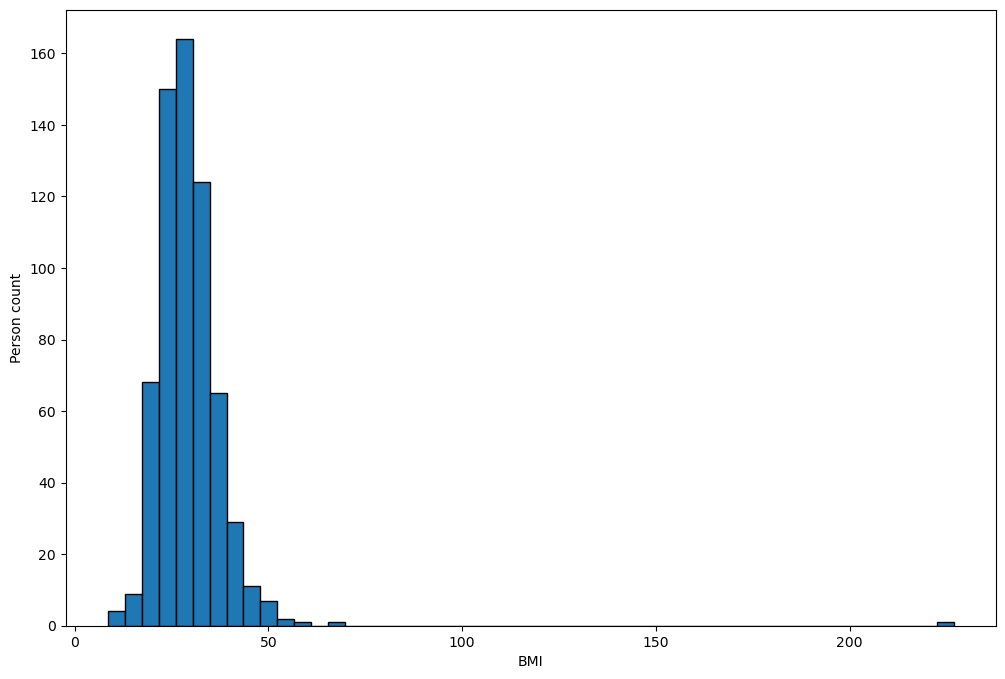

In [ ]:

weights = awi_hyp.bmi_c
 
# list of bins
bins = [30, 40, 50, 60]
# bins =  urbanData.age
# plotting labelled histogram
plt.hist(weights, bins=50, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Person count')
plt.show()

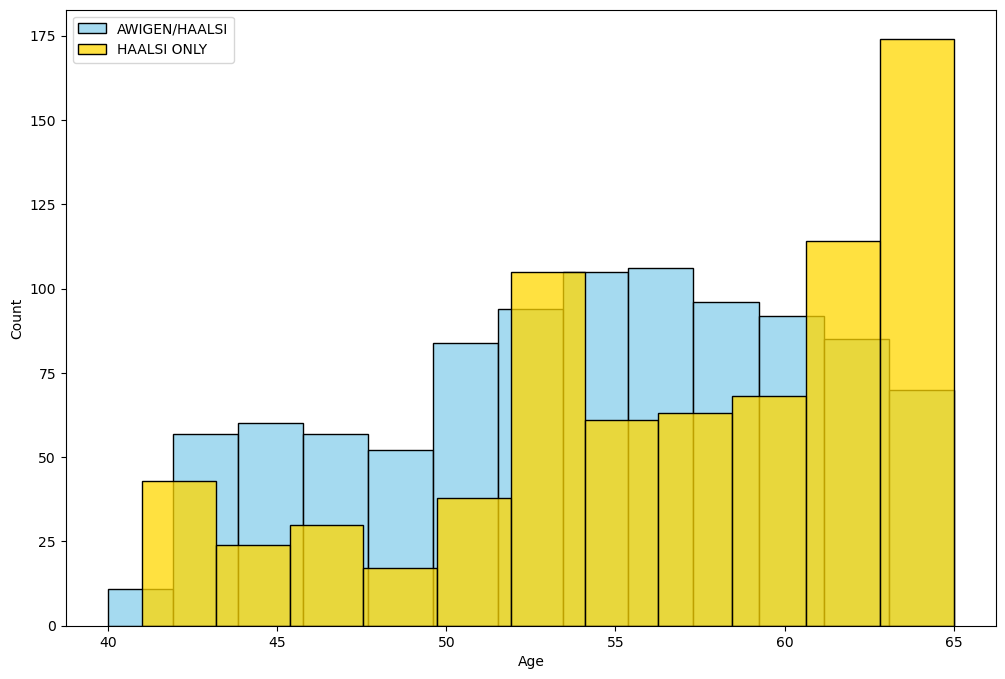

In [ ]:

sns.histplot(data=awi_hyp, x="Age", color="skyblue", label="AWIGEN/HAALSI", kde=False)
sns.histplot(data=haa_hyp, x="Age", color="gold", label="HAALSI ONLY", kde=False)
# sns.histplot(data=awigen_hyp, x="age", color="brown", label="AWIGEN", kde=False)

plt.legend() 
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.legend(['d', 'r'])
sns.kdeplot(data=HAALSI_ONLY_TR, x = 'chol_t_mmol', bw_adjust=5)
sns.kdeplot(data=HAALSI_AWI_TR, x = 'chol_t_mmol', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR, x = 'cholesterol_1_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.legend(['d', 'r'])
# sns.kdeplot(data=HAALSI_ONLY_TR_AGE, x = 'chol_t_mmol', bw_adjust=5)
# sns.kdeplot(data=HAALSI_AWI_TR_AGE, x = 'chol_t_mmol', bw_adjust=5)
# sns.kdeplot(data=AWIGEN_TR_AGE, x = 'cholesterol_1_qc', bw_adjust=5)
# plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])

plt.title("probability plot for CVD");
sns.kdeplot(data=HAALSI_ONLY_TR_AGE, x= 'cvd_status', y = 'Age', bw_adjust=5, legend = 'AG')
sns.kdeplot(data=HAALSI_AWI_TR_AGE, x= 'cvd_status', y = 'Age', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR_AGE, x= 'cadiovascular_current', y = 'age', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.show()

In [ ]:
predictors = ['Sex', 'Age',
       'bp_sys', 'bp_dia', 'diab_rx_ever',
       'stroke_ever', 'trans_isc',
       'hrt_atck_ever', 'hrt_fail', 'angina_ever', 'bmi', 'height_cm',
       'weight_kg', 'chol_t_mmol', 'ldl_mmol', 'hdl_mmol', 'trigs_mmol',
       'waist_cm', 'hip_cm',
       'hiv_status_slf_rpt', 'actv_mpa',
       'alco_ever', 'alco_cur', 'tobac_ever', 'tobac_cur',
       'wealth_quintile', 'education_status', 'marital_status',
       'employment_status', 'hpt_ever',
       'bmi_c', 'ldl_c', 'waist_hip_ratio', 'smoking_status']
outcome_cols = ['diabetes_status', 'cvd_status', 'hypertension_status', 'diab_hx']

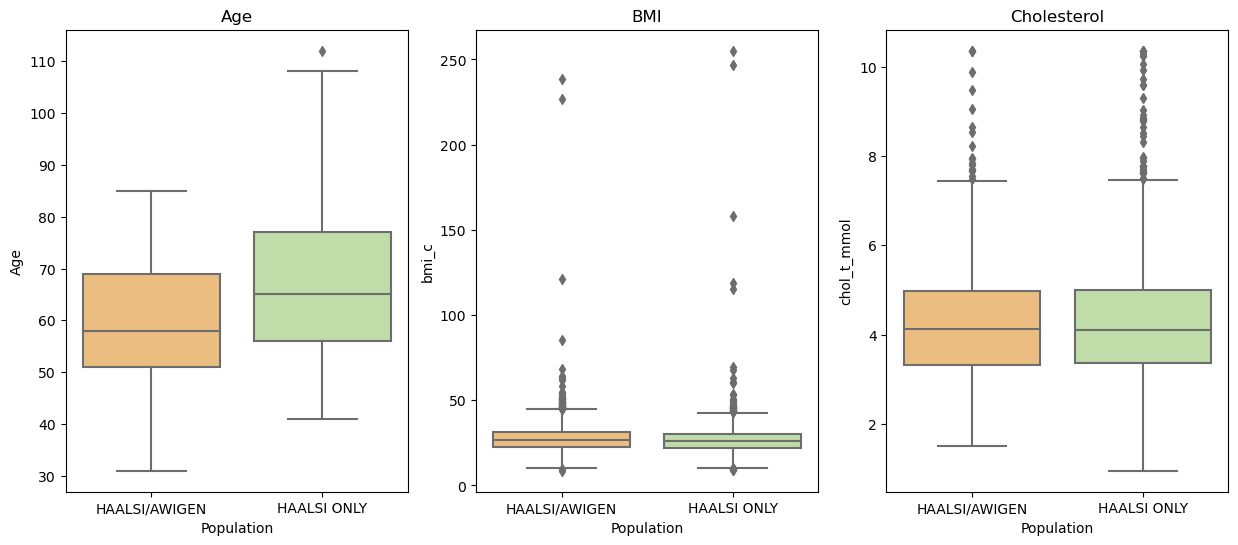

In [ ]:

# plt.subplot(121)
# plt.title("boxplot for status and nodes");
# sns.boxplot(y='bmi_c', data=HAALSI_ONLY_TR)

# plt.subplot(122)
# sns.boxplot(y ='bmi_c', data=HAALSI_AWI_TR)
# plt.title("boxplot for status and age");
# plt.show()
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.title("Age");
sns.boxplot(x= 'Population', y='Age', data=newData_TR, palette="Spectral")

plt.subplot(132)
sns.boxplot(x= 'Population', y='bmi_c', data=newData_TR, palette="Spectral")
plt.title("BMI");

plt.subplot(133)
plt.title("Cholesterol");
sns.boxplot(x= 'Population', y='chol_t_mmol', data=newData_TR, palette="Spectral")

# plt.subplot(144)
# sns.boxplot(x= 'awigen', y='trigs_mmol', data=newData_TR, hue = 'Population')
# plt.title("boxplot for status and age");
plt.show()

<Figure size 640x480 with 0 Axes>

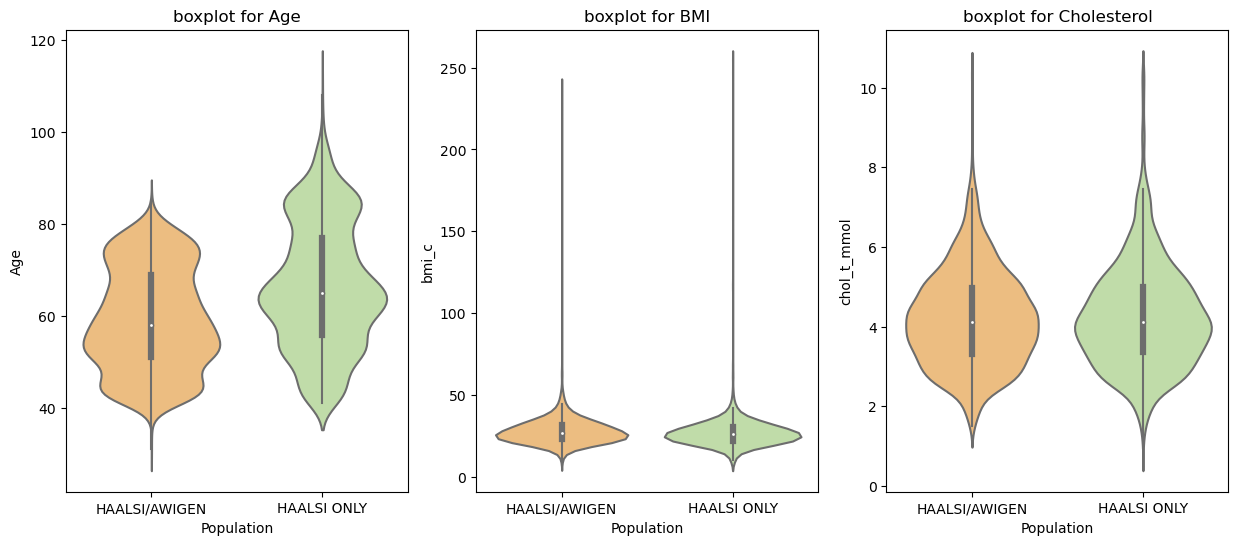

In [ ]:
fig = plt.figure()
# ax = fig.add_subplot(211)

plt.figure(figsize=(15,6))
fig.suptitle("Tips by time of day" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
plt.subplot(131)
plt.title("boxplot for Age");
sns.violinplot(x= 'Population', y='Age', data=newData_TR, palette="Spectral")

plt.subplot(132)
sns.violinplot(x= 'Population', y ='bmi_c', data=newData_TR, palette="Spectral")
plt.title("boxplot for BMI");

plt.subplot(133)
sns.violinplot(x= 'Population', y ='chol_t_mmol', data=newData_TR, palette="Spectral")
plt.title("boxplot for Cholesterol");
plt.show()

<Figure size 640x480 with 0 Axes>

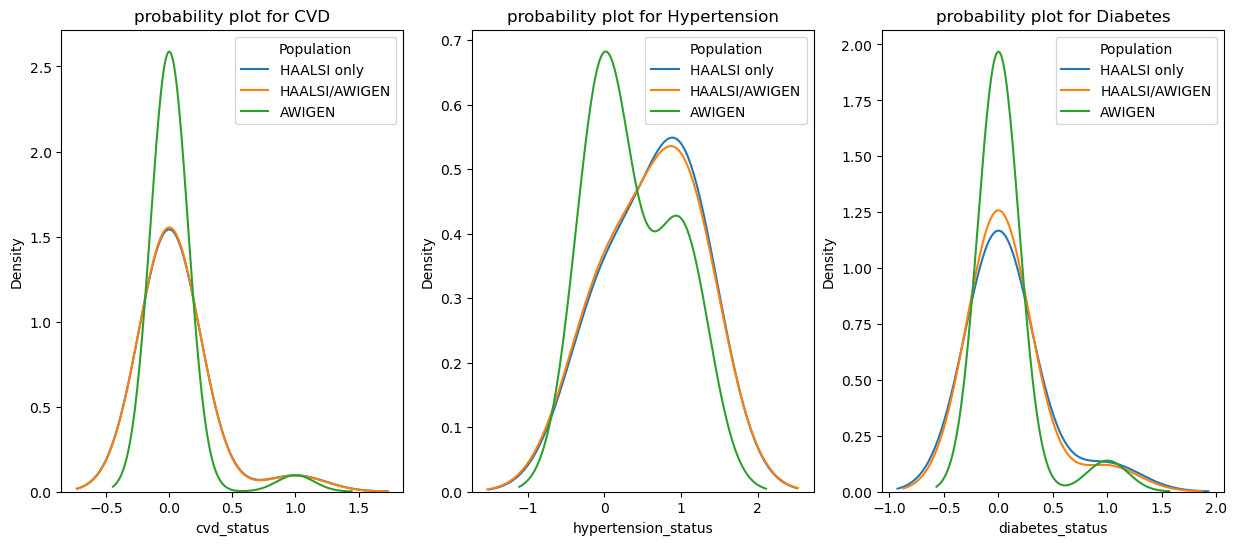

In [ ]:
fig = plt.figure()
# ax = fig.add_subplot(111)
plt.figure(figsize=(15,6))
# ax.legend(['d', 'r'])
plt.subplot(131)
plt.title("probability plot for CVD");
sns.kdeplot(data=HAALSI_ONLY_TR, x = 'cvd_status', bw_adjust=5, legend = 'AG')
sns.kdeplot(data=HAALSI_AWI_TR, x = 'cvd_status', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR, x = 'cadiovascular_current', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.subplot(132)
plt.title("probability plot for Hypertension");
sns.kdeplot(data=HAALSI_ONLY_TR, x = 'hypertension_status', bw_adjust=5, legend = 'AG')
sns.kdeplot(data=HAALSI_AWI_TR, x = 'hypertension_status', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR, x = 'htn_jnc7_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.subplot(133)
plt.title("probability plot for Diabetes");
sns.kdeplot(data=HAALSI_ONLY_TR, x = 'diabetes_status', bw_adjust=5, legend = 'AG')
sns.kdeplot(data=HAALSI_AWI_TR, x = 'diabetes_status', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR, x = 'diabetes_status_c_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
# plt.subplot(224)
# plt.title("probability plot for Diabetes");
# sns.kdeplot(data=HAALSI_ONLY_TR, x = 'diabetes_status', bw_adjust=5, legend = 'AG')
# sns.kdeplot(data=HAALSI_AWI_TR, x = 'diabetes_status', bw_adjust=5)
# sns.kdeplot(data=AWIGEN_TR, x = 'diabetes_status_c_qc', bw_adjust=5)
# plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.show()

<Figure size 640x480 with 0 Axes>

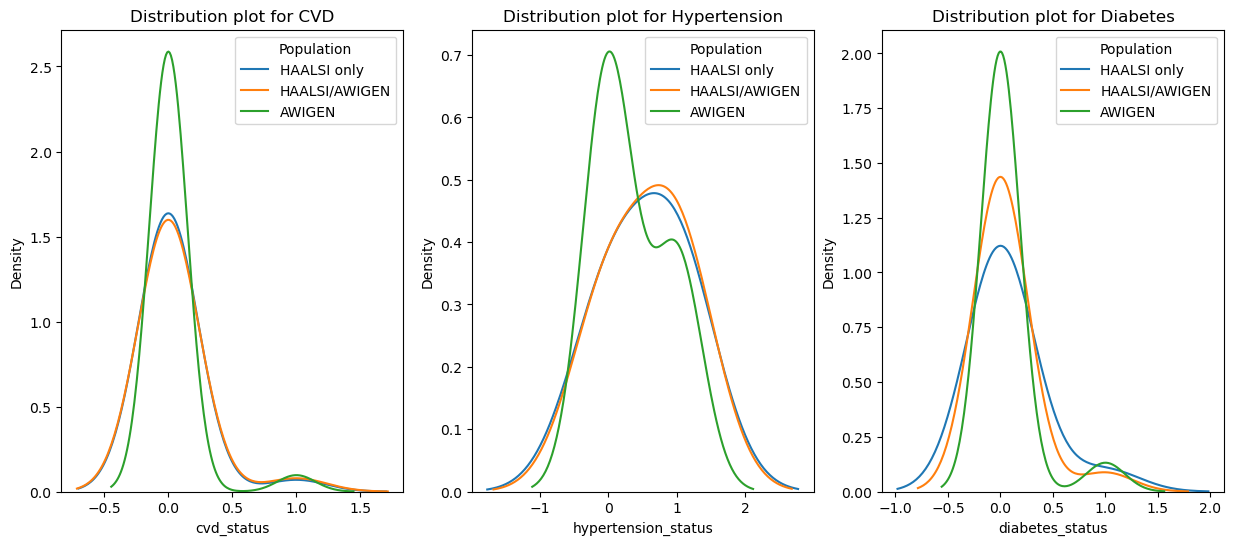

In [ ]:
fig = plt.figure()
# ax = fig.add_subplot(111)
plt.figure(figsize=(15,6))
# ax.legend(['d', 'r'])
plt.subplot(131)
plt.title("Distribution plot for CVD");
sns.kdeplot(data=HAALSI_ONLY_TR_AGE, x = 'cvd_status', bw_adjust=5, legend = 'AG')
sns.kdeplot(data=HAALSI_AWI_TR_AGE, x = 'cvd_status', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR_AGE, x = 'cadiovascular_current', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.subplot(132)
plt.title("Distribution plot for Hypertension");
sns.kdeplot(data=HAALSI_ONLY_TR_AGE, x = 'hypertension_status', bw_adjust=5, legend = 'AG')
sns.kdeplot(data=HAALSI_AWI_TR_AGE, x = 'hypertension_status', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR_AGE, x = 'htn_jnc7_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.subplot(133)
plt.title("Distribution plot for Diabetes");
sns.kdeplot(data=HAALSI_ONLY_TR_AGE, x = 'diabetes_status', bw_adjust=5, legend = 'AG')
sns.kdeplot(data=HAALSI_AWI_TR_AGE, x = 'diabetes_status', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR_AGE, x = 'diabetes_status_c_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.show()

<Figure size 640x480 with 0 Axes>

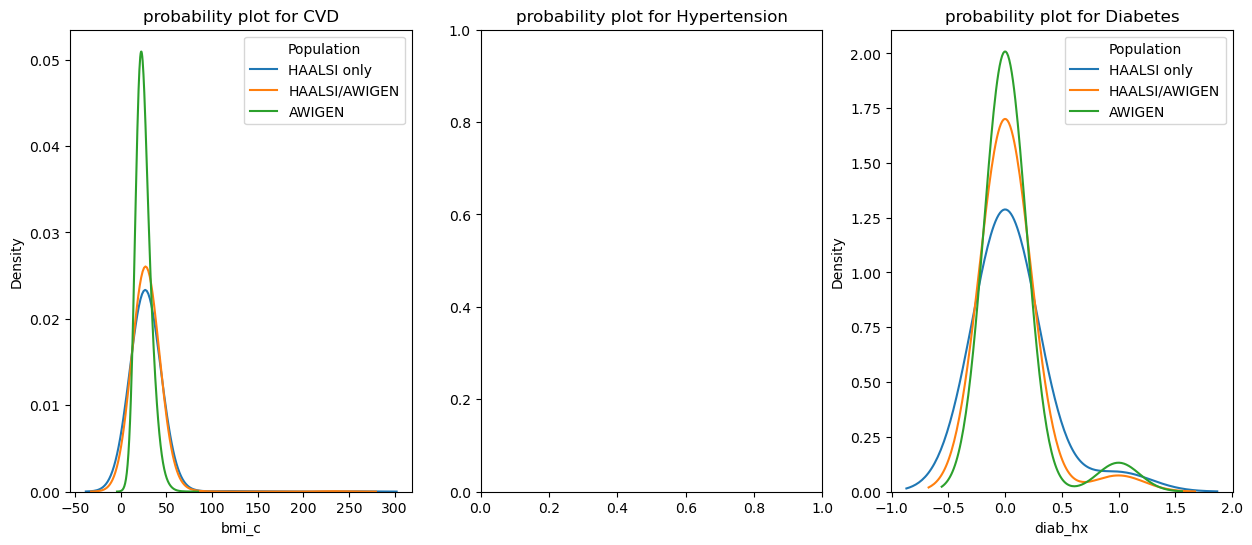

In [ ]:
fig = plt.figure()
# ax = fig.add_subplot(111)
plt.figure(figsize=(15,6))
# ax.legend(['d', 'r'])
plt.subplot(131)
plt.title("probability plot for CVD");
sns.kdeplot(data=HAALSI_ONLY_TR_AGE, x = 'bmi_c', bw_adjust=5, legend = 'AG')
sns.kdeplot(data=HAALSI_AWI_TR_AGE, x = 'bmi_c', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR_AGE, x = 'bmi_c_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.subplot(132)
plt.title("probability plot for Hypertension");
# sns.kdeplot(data=HAALSI_ONLY_TR_AGE, x = 'ldl_c', bw_adjust=5, legend = 'AG')
# sns.kdeplot(data=HAALSI_AWI_TR_AGE, x = 'ldl_c', bw_adjust=5)
# sns.kdeplot(data=AWIGEN_TR_AGE, x = 'ldl_qc', bw_adjust=5)
# plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.subplot(133)
plt.title("probability plot for Diabetes");
sns.kdeplot(data=HAALSI_ONLY_TR_AGE, x = 'diab_hx', bw_adjust=5)
sns.kdeplot(data=HAALSI_AWI_TR_AGE, x = 'diab_hx', bw_adjust=5)
sns.kdeplot(data=AWIGEN_TR_AGE, x = 'diabetes_status_c_qc', bw_adjust=5)
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])
plt.show()

<Axes: >

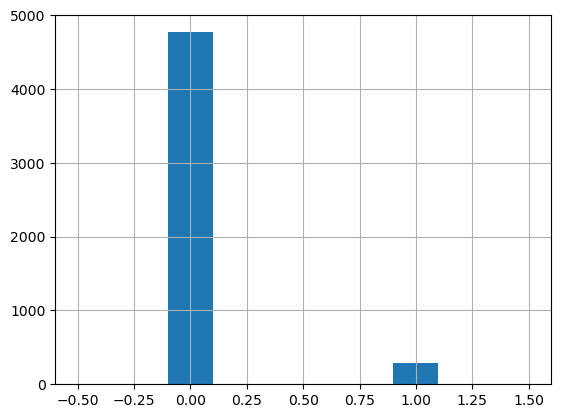

In [ ]:
# newData.loc[newData.loc[:,'cvd_status']]
# newData.iloc[:,53]
newData.loc[:,'cvd_status'].hist(range=(-0.5,1.5),bins=10)

array([[<Axes: title={'center': '0'}>]], dtype=object)

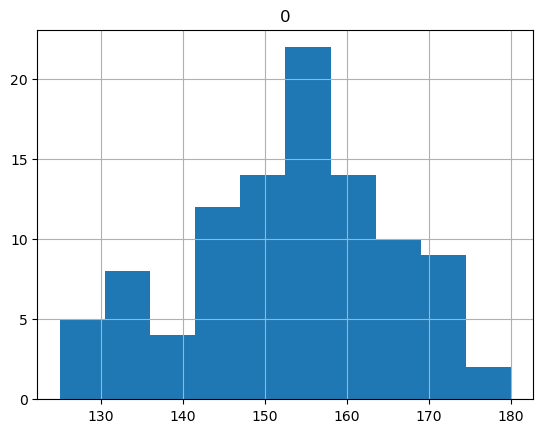

In [ ]:
flip = st.binom.rvs(HAALSI_ONLY_TR.shape[0], p = 0.06, size = 100)
pd.DataFrame(flip).hist(bins=10)

In [ ]:
HAALSI_ONLY_TR['cvd_status'].value_counts()

0    2423
1     150
Name: cvd_status, dtype: int64

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=42)

# let's create a MICE imputer using Bayes as estimator

imputer = IterativeImputer(
    estimator=BayesianRidge(), # the estimator to predict the NA
    initial_strategy='mean', # how will NA be imputed in step 1
    max_iter=10, # number of cycles
    imputation_order='ascending', # the order in which to impute the variables
    n_nearest_features=None, # whether to limit the number of predictors
    skip_complete=True, # whether to ignore variables without NA
    random_state=0,
)
imputer.fit(dff1[predictor_cols])
train_t = imputer.transform(dff1[predictor_cols])
# train_x = imputer.transform(data.iloc[:,2:])
treated = pd.DataFrame(train_t, columns=dff1[predictor_cols].columns)
treated = treated.apply(np.ceil)

fig = plt.figure()
ax = fig.add_subplot(111)
dff1['number_of_children_c'].plot(kind='kde', ax=ax, color='blue')
treated['number_of_children_c'].plot(kind='kde', ax=ax, color='green')

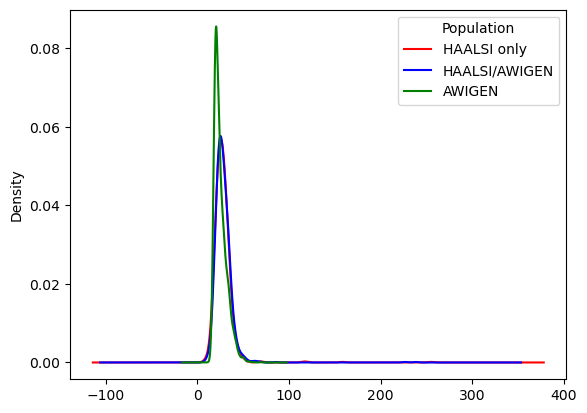

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
HAALSI_ONLY_TR_AGE['bmi_c'].plot(kind='kde', ax=ax, color='red')
HAALSI_AWI_TR_AGE['bmi_c'].plot(kind='kde', ax=ax, color='blue')
AWIGEN_TR_AGE['bmi_c_qc'].plot(kind='kde', ax=ax, color='green')
plt.legend(title='Population', loc='upper right', labels=['HAALSI only', 'HAALSI/AWIGEN', 'AWIGEN'])


In [ ]:
np.min(HAALSI_ONLY_TR['bmi_c'])

8.930087143503847

/Users/kayadetunji/opt/anaconda3/envs/kay/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/kayadetunji/opt/anaconda3/envs/kay/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*pl

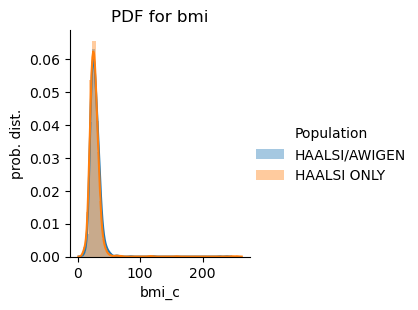

In [ ]:
# plt.subplot(121)
sns.FacetGrid(data=newData, hue = "Population").map(sns.distplot, "bmi_c").add_legend();
plt.ylabel("prob. dist.");
plt.title("PDF for bmi");
# plt.subplot(122)
# sns.FacetGrid(data=HAALSI_AWI_TR, hue = "cvd_status").map(sns.distplot, "Age").add_legend();
# # plt.ylabel("prob. dist.");
# plt.title("PDF for age");
plt.show()